In [186]:
%matplotlib inline
import numpy as np
from pylab import *
from astropy.io import fits
from statsmodels.robust import scale
from sklearn import preprocessing as pp

from seaborn import *

style.use('fivethirtyeight')
from IPython import display
rcParams['axes.grid'] = False
rcParams['lines.linewidth'] = 1.0

In [187]:
from ipywidgets import widgets
# from IPython.display import display
from IPython         import display

In [188]:
mask0   = fits.open('NRCNRCALONG-DARK-53421914341_1_485_SE_2015-12-08T21h45m34_mask.fits')
darks0  = fits.open('NRCNRCALONG-DARK-53421914341_1_485_SE_2015-12-08T21h45m34.fits')

In [189]:
nQuirks = sum(mask0[0].data[0] != 0)
nQuirks

5042

In [190]:
mask    = mask0[0].data[0]
darks   = darks0[0].data

In [191]:
darks

array([[[7322, 8931, 8394, ..., 7903, 8897, 6407],
        [8227, 7956, 8631, ..., 6691, 8393, 8086],
        [8205, 8517, 8245, ..., 6479, 8690, 7070],
        ..., 
        [7100, 7810, 6948, ..., 7013, 7934, 7239],
        [6623, 7681, 8734, ..., 7695, 8100, 7239],
        [8685, 8306, 7008, ..., 7078, 7742, 7082]],

       [[7338, 8954, 8410, ..., 7856, 8857, 6362],
        [8240, 7977, 8652, ..., 6647, 8347, 8043],
        [8232, 8538, 8263, ..., 6438, 8652, 7024],
        ..., 
        [7131, 7849, 6996, ..., 6980, 7897, 7213],
        [6660, 7718, 8773, ..., 7658, 8077, 7214],
        [8726, 8332, 7040, ..., 7041, 7703, 7057]],

       [[7365, 8980, 8438, ..., 7890, 8876, 6383],
        [8264, 7997, 8674, ..., 6675, 8371, 8063],
        [8251, 8561, 8284, ..., 6468, 8669, 7043],
        ..., 
        [7132, 7844, 6997, ..., 6986, 7903, 7215],
        [6663, 7717, 8777, ..., 7669, 8073, 7221],
        [8734, 8340, 7045, ..., 7059, 7717, 7068]],

       ..., 
       [[7361, 8972, 

In [192]:
quirks_store  = np.loadtxt('quirks_FINAL_for_cnaw_mask_CV3_dark_frames.txt')
classes_store = np.loadtxt('myclasses_new_FINAL_for_cnaw_mask_CV3_dark_frames.txt').astype(int)

Check If All Class 1 Bad Pixels Are Indeed Just Noisy Pixels
---

In [193]:
quirks_store[classes_store == 1].shape

(141, 108)

RuntimeError: LaTeX was not able to process the following string:
b'Entry:1323/ Class:1'
Here is the full report generated by LaTeX: 



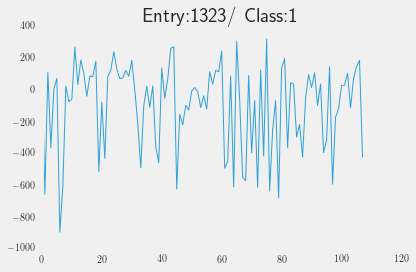

In [194]:
fig = figure()#figsize=(6,6))
ax  = fig.add_subplot(111)
# ax.plot([nan,nan])
corrections = []
for cnow in np.where(classes_store == 1)[0]:
    # ax.lines.pop()
    ax.clear()
    ax.plot(quirks_store[cnow] - median(quirks_store[cnow]))
    ax.set_title('Entry:' + str(cnow) + '/ Class:' + str(classes_store[cnow]))
    fig.canvas.draw()
    display.display(plt.gcf())
    display.clear_output(wait=True)
#     checkClass = input('Is this a Noisy Pixel? ');
#     if checkClass != '':
#         corrections.append([cnow, checkClass])
# for cnow in np.where(classes_store == 1)[0]:
#     plt.plot(quirks_store[cnow])
#     display.clear_output(wait=True)
#     display.display(plt.gcf())
#     checkClass = input('Is this a Noisy Pixel? ');print(checkClass)
#     plt.clf()
#     display.clear_output(wait=True)

Check If All Class 4 Bad Pixels Are Indeed Just CR Pixels
---

In [ ]:
quirks_store[classes_store == 4].shape

In [ ]:
fig = figure()#figsize=(6,6))
ax  = fig.add_subplot(111)

CRs = np.where(classes_store == 4)[0]
corrections = []
for cnow in :
    # ax.lines.pop()
    ax  = fig.add_subplot(111)
    ax.plot((quirks_store[cnow] - min(quirks_store[cnow])) / (max(quirks_store[cnow]) - min(quirks_store[cnow])), lw=2)
    ax.set_title('Entry:' + str(cnow) + '/ Class:' + str(classes_store[cnow]))
    ax.annotate(str(cnow), [110, 0.5], fontsize=50)
    fig.canvas.draw()
    display.display(plt.gcf())
    time.sleep(.05)
    display.clear_output(wait=True)
    ax.lines.pop()
    ax.texts.pop()
    if cnow > 500 and cnow < 1000:
        display.display(plt.clf())
        ax = fig.add_subplot(111)
#     checkClass = input('Is this a Cosmic Ray? ');
#     if checkClass != '':
#         corrections.append([cnow, checkClass])
# for cnow in np.where(classes_store == 1)[0]:
#     plt.plot(quirks_store[cnow])
#     display.clear_output(wait=True)
#     display.display(plt.gcf())
#     checkClass = input('Is this a Noisy Pixel? ');print(checkClass)
#     plt.clf()
#     display.clear_output(wait=True)

In [195]:
corrections

[]

In [ ]:
np.where(classes_store == 4)[0][69]

In [ ]:
plot(quirks_store[140])
plot(quirks_store[260])
plot(quirks_store[380])

In [ ]:
((quirks_store.T - np.min(quirks_store,axis=1)) / (np.max(quirks_store,axis=1) - np.min(quirks_store, axis=1))).shape

In [ ]:
((quirks_store.T - np.min(quirks_store,axis=1)) / (np.max(quirks_store,axis=1) - np.min(quirks_store, axis=1))).T[classes_store == 4].T.shape

In [ ]:
np.sum(classes_store == 2) // 100

In [ ]:
quirk_store_norm = ((quirks_store.T - np.min(quirks_store,axis=1)) / (np.max(quirks_store,axis=1) - np.min(quirks_store, axis=1))).T

In [ ]:
classNow  = 4
k = 1
stepsize  = 100
quirksNow = quirk_store_norm[classes_store == classNow][k*stepsize:(k+1)*stepsize].T
quirksNow.shape

In [ ]:
classes_store_bak = np.copy(classes_store)

In [ ]:
classNow  = 5
stepsize  = 50
fig = figure(figsize=(16,30))
for k in range( np.sum(classes_store == classNow) // stepsize):
    quirksNow = quirk_store_norm[classes_store == classNow][k*stepsize:(k+1)*stepsize]
#     upper     = np.where(quirksNow[:,-1] > 0.5)[0]
    lower     = np.where(quirksNow[:,-1] < 0.5)[0]
    classes_store[classes_store == classNow][lower] = np.ones(len(classes_store[classes_store == classNow][lower]))*6
#     ax = fig.add_subplot(np.int(np.ceil(np.sum(classes_store == classNow) // stepsize / 2)), 2, k+1)
#     plot(quirksNow[lower].T);

In [ ]:
fig = figure(figsize=(16,8))
ax1  = fig.add_subplot(121)
ax2  = fig.add_subplot(122)
ax1.plot(quirk_store_norm[classes_store == 5].T, lw=1);
ax2.plot(quirk_store_norm[classes_store == 6].T, lw=1);

In [ ]:
darks.shape

In [ ]:
darks_trnspsd = np.transpose(darks, axes=(1,2,0))
for irow in range(len(quirks_store)):
    quirk_pp  = pp.scale(quirks_store[irow])
    # print(std(quirk_pp), scale.mad(quirk_pp))
    plot(quirk_pp, alpha=0.5)# - median(darks_trnspsd[icol,irow])))
# darks_scaled  = pp.scale(darks,axis=0)

In [ ]:
darks.shape, darks_trnspsd.shape

In [ ]:
darks_reshaped = darks_trnspsd.reshape(darks_trnspsd.shape[0]*darks_trnspsd.shape[1], darks_trnspsd.shape[2])

In [ ]:
darks_reshaped.shape

In [ ]:
icol,irow = np.random.randint(0,2048,2)
pp.scale(darks_trnspsd[icol,irow] / median(darks_trnspsd[icol,irow]))

In [ ]:
darks_norm  = darks / median(darks, axis=0)

In [ ]:
darks_std   = std(darks_norm, axis=0)
darks_std.shape

In [ ]:
darks_med_std = median(darks_std)

In [ ]:
darks_flat = []
for irow in range(darks_reshaped.shape[0]):
    limit_check = std(darks_reshaped[irow] / median(darks_reshaped[irow])-1) < 2*darks_med_std
    # print(limit_check, std(darks_reshaped[irow] / median(darks_reshaped[irow])), darks_med_std)
    if limit_check:
        darks_flat.append(darks_reshaped[irow])

nNormals    = len(darks_flat)
nNormals

In [ ]:
darks_flat = np.array(darks_flat)
darks_flat.shape

In [ ]:
darks_norm_trnspsd = np.transpose(darks_norm, axes=(1,2,0))
darks_norm_flat    = darks_norm_trnspsd[darks_std < 2*darks_med_std]

In [ ]:
darks_norm_flat.shape

In [ ]:
darks_norm_flat.shape[0]

Simulate RTNs because the CV3 training data has None
---

In [ ]:
np.random.seed(42)
saturation= 2**16
dynRange  = 2**9
nSamps    = 1000
nFrames   = darks_norm_flat.shape[1]
rtn_syn   = np.zeros((nSamps, nFrames))

maxRTNs   = np.int(0.9*nFrames)
maxWidth  = 50
minWidth  = 10
rtnCnt    = 0

dark_inds = np.arange(darks_reshaped.shape[0])
frame_inds= np.arange(darks_reshaped.shape[1])
for irow in np.random.choice(dark_inds,nSamps,replace=False):
    rtn_syn[rtnCnt] = np.copy(darks_reshaped[irow])
    if darks_reshaped[irow].std() > 50:
        print(darks_reshaped[irow].std())
    nRTNs     = np.random.randint(maxRTNs)
    
    coinflip  = np.random.randint(0, 2)
    sign_rand = np.random.choice([-1,1])
    minJump   = 4*std(rtn_syn[rtnCnt] - median(rtn_syn[rtnCnt]))
    jump      = np.random.normal(minJump,dynRange)
    if coinflip:
        RTN_locs  = np.random.choice(frame_inds, nRTNs, replace=False)
        for iRTN in RTN_locs:
            rtn_syn[rtnCnt][iRTN] += sign_rand*jump
    else:
        randWidth = np.random.randint(minWidth, maxWidth + 1)
        randStart = np.random.randint(minWidth, nFrames - randWidth - minWidth + 1)
        rtn_syn[rtnCnt][randStart:randStart+randWidth] += sign_rand*jump
    
    rtn_syn[rtnCnt][rtn_syn[rtnCnt] > saturation] = saturation
    # if not rtnCnt % 100:
    plot(rtn_syn[rtnCnt] - median(rtn_syn[rtnCnt]))
    
    rtnCnt  = rtnCnt + 1

xlim(-1,110);
# ylim(-100,100);

In [ ]:
np.random.seed(42)
nFlatDarks        = 5000
df_inds           = np.arange(darks_flat.shape[0])
df_sample         = np.random.choice(df_inds, nFlatDarks, replace=False)
darks_flat_sample = np.copy(darks_flat[df_sample])

In [ ]:
plot(darks_flat_sample.T - median(darks_flat_sample,axis=1));

In [ ]:
darks_flat_sample.shape

In [ ]:
for k in range(darks_flat_sample.shape[0]):
    if (darks_flat_sample[k] - median(darks_flat_sample[k]) > 200).any():
        print(k)

In [ ]:
std(abs(darks_flat_sample[850] / median(darks_flat_sample[850]))-1), 2*darks_med_std

In [ ]:
plot(darks_flat_sample.T - median(darks_flat_sample,axis=1));

In [ ]:
darks_classes     = np.zeros(darks_flat_sample.shape[0],dtype=int)
rtn_classes       = np.ones(rtn_syn.shape[0],dtype=int)*3
samples_train_set = vstack([quirks_store, rtn_syn, darks_flat_sample])
classes_train_set = vstack([classes_store[:,None], rtn_classes[:,None], darks_classes[:,None]])[:,0]

In [ ]:
samples_train_set.shape

In [ ]:
sts_inds   = np.arange(samples_train_set.shape[0])
unsort_sts = np.random.choice(sts_inds, sts_inds.size, replace=False)

In [ ]:
samples_train_set_resort = np.copy(samples_train_set[unsort_sts])
classes_train_resort = np.copy(classes_train_set[unsort_sts])

Random Forest Classification
---

Rescaled all samples from 0 to 1

In [223]:
samples_train_set_resort_scaled = (       samples_train_set_resort.T  - np.min(samples_train_set_resort,axis=1)) / \
                                  (np.max(samples_train_set_resort,axis=1) - np.min(samples_train_set_resort,axis=1))

In [225]:
samples_train_set_resort_scaled.shape

(108, 11041)

/Users/jonathanfraine/anaconda/lib/python3.5/site-packages/matplotlib/figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


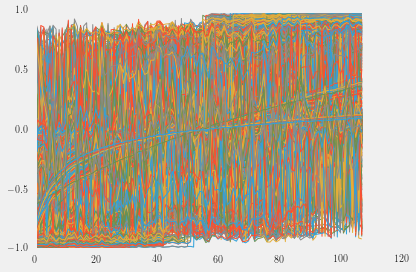

In [227]:
plot(samples_train_set_resort_scaled - median(samples_train_set_resort_scaled,axis=0));

Load Sci-kit Learn Libraries

In [234]:
from sklearn.ensemble         import RandomForestClassifier
from sklearn.utils            import shuffle
from sklearn.cross_validation import train_test_split
from sklearn.externals        import joblib

Establish Random Forest Classification
- 1000 trees
- OOB Score
- Multiprocessing

In [211]:
rfc = RandomForestClassifier(n_estimators=1000, oob_score=True, n_jobs=-1, random_state=42, verbose=True)

In [264]:
rfc2 = RandomForestClassifier(n_estimators=1000, oob_score=True, n_jobs=-1, random_state=42, verbose=True)

Split Samples into 75% Train and 25% Test

In [229]:
X_train, X_test, Y_train, Y_test = train_test_split(samples_train_set_resort_scaled.T, classes_train_resort, test_size = 0.25, random_state=42)

In [230]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((8280, 108), (2761, 108), (8280,), (2761,))

Shuffle Training Data Set

In [ ]:
X_train, Y_train = shuffle(X_train, Y_train, random_state=42)

Train Classifier with `rfc.fit`

In [231]:
rfc.fit(X_train, Y_train)

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   11.4s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:   20.4s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   25.7s finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
            oob_score=True, random_state=42, verbose=True,
            warm_start=False)

In [265]:
rfc2.fit(samples_train_set_resort_scaled.T, classes_train_resort)

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    7.2s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   17.3s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:   31.1s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   40.4s finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
            oob_score=True, random_state=42, verbose=True,
            warm_start=False)

Score Classifier with Test Data Score

In [267]:
rfc.score(X_test, Y_test), rfc.score(samples_train_set_resort_scaled.T, classes_train_resort)

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    0.3s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.7s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    1.0s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    1.3s finished


(0.9811662441144513, 0.99529028167738431)

Score Classifier with Out-of-Bag Error

In [266]:
rfc.oob_score_, rfc2.oob_score_

(0.97886473429951693, 0.98170455574676208)

Save Random Forest Classifier becuse 98% is AWESOME!

In [258]:
joblib.dump(rfc, 'trained_RF_Classifier/random_forest_classifier_trained_on_resorted_samples_train_set_RTN_CR_HP_Other_Norm.save')
joblib.dump(dict(samples=samples_train_set_resort_scaled.T, classes=classes_train_resort), 'trained_RF_Classifier/RTN_CR_HP_Other_Norm_resorted_samples_train_set.save')

['trained_RF_Classifier/RTN_CR_HP_Other_Norm_resorted_samples_train_set.save',
 'trained_RF_Classifier/RTN_CR_HP_Other_Norm_resorted_samples_train_set.save_01.npy',
 'trained_RF_Classifier/RTN_CR_HP_Other_Norm_resorted_samples_train_set.save_02.npy']

In [268]:
joblib.dump(rfc2, 'trained_RF_Classifier/random_forest_classifier_trained_full_set_on_resorted_samples_train_set_RTN_CR_HP_Other_Norm.save')

['trained_RF_Classifier/random_forest_classifier_trained_full_set_on_resorted_samples_train_set_RTN_CR_HP_Other_Norm.save',
 'trained_RF_Classifier/random_forest_classifier_trained_full_set_on_resorted_samples_train_set_RTN_CR_HP_Other_Norm.save_01.npy',
 'trained_RF_Classifier/random_forest_classifier_trained_full_set_on_resorted_samples_train_set_RTN_CR_HP_Other_Norm.save_02.npy',
 'trained_RF_Classifier/random_forest_classifier_trained_full_set_on_resorted_samples_train_set_RTN_CR_HP_Other_Norm.save_03.npy',
 'trained_RF_Classifier/random_forest_classifier_trained_full_set_on_resorted_samples_train_set_RTN_CR_HP_Other_Norm.save_04.npy',
 'trained_RF_Classifier/random_forest_classifier_trained_full_set_on_resorted_samples_train_set_RTN_CR_HP_Other_Norm.save_05.npy',
 'trained_RF_Classifier/random_forest_classifier_trained_full_set_on_resorted_samples_train_set_RTN_CR_HP_Other_Norm.save_06.npy',
 'trained_RF_Classifier/random_forest_classifier_trained_full_set_on_resorted_samples_trai

In [202]:
darks_reshaped.shape

(4194304, 108)

In [281]:
rfc_pred.size

4194304

In [279]:
arange(99*rfc_pred.size//skipsize,min((99+1)*rfc_pred.size//skipsize, rfc_pred.size))

array([4152360, 4152361, 4152362, ..., 4194301, 4194302, 4194303])

In [317]:
darks_reshaped.shape

(4194304, 108)

In [335]:
darks_reshaped_k_scaled = ((darks_reshaped[chunkNow].T - np.min(darks_reshaped[chunkNow],axis=1)) / \
                              ((np.max(darks_reshaped[chunkNow],axis=1) - np.min(darks_reshaped[chunkNow],axis=1)))).T

In [338]:
X_train.shape, darks_reshaped_k_scaled.shape

((8280, 108), (41944, 108))

/Users/jonathanfraine/anaconda/lib/python3.5/site-packages/matplotlib/figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


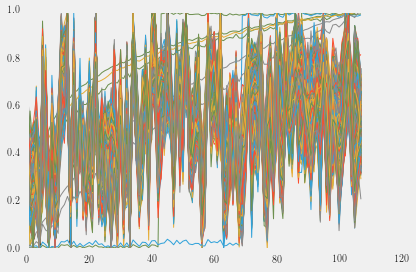

In [325]:
plot(darks_reshaped_k_scaled[:,::10]);

In [328]:
X_train.shape

(8280, 108)

In [340]:
rfc_pred = np.zeros(darks_reshaped.shape[0])
rfc2_pred= np.zeros(darks_reshaped.shape[0])
step     = 1
skipsize = 100
for step in range(skipsize):
    chunkNow = arange(step*rfc_pred.size//skipsize,min((step+1)*rfc_pred.size//skipsize, rfc_pred.size))
    print(chunkNow.min(), chunkNow.max())
    #
    darks_reshaped_k_scaled = ((darks_reshaped[chunkNow].T - np.min(darks_reshaped[chunkNow],axis=1)) / \
                              ((np.max(darks_reshaped[chunkNow],axis=1) - np.min(darks_reshaped[chunkNow],axis=1)))).T
    rfc2_pred[chunkNow]     = rfc2.predict(darks_reshaped_k_scaled)
    rfc_pred[chunkNow]      = rfc.predict(darks_reshaped_k_scaled)

# rfc_pred[k] = rfc.predict(darks_reshaped_k_scaled)
# del darks_reshaped_k_scaled

0 41942


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    1.3s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    2.6s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    4.4s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    5.5s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.9s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.8s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    3.0s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    3.7s finished


41943 83885


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.8s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.7s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    3.3s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    4.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.7s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.6s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    3.0s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    3.9s finished


83886 125828


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.8s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.7s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    2.7s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    3.4s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.7s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.4s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    2.4s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    2.9s finished


125829 167771


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.7s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    3.3s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    4.1s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.7s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.4s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    2.4s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    3.1s finished


167772 209714


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.7s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.8s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    2.9s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    3.6s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.7s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.5s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    2.8s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    3.6s finished


209715 251657


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.9s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.9s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    3.3s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    4.2s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.9s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.9s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    3.0s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    3.8s finished


251658 293600


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.7s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.5s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    2.5s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    3.1s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.2s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    2.2s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    2.9s finished


293601 335543


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.7s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.5s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    2.5s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    3.1s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.3s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    2.3s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    3.0s finished


335544 377486


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.7s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.3s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    2.3s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    2.9s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.2s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    2.1s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    2.7s finished


377487 419429


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.7s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.5s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    2.4s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    3.1s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.7s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.4s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    2.4s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    3.0s finished


419430 461372


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.7s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.9s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    3.4s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    3.9s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.3s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    2.2s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    2.8s finished


461373 503315


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.2s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    2.7s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    3.4s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.7s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.5s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    2.4s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    2.9s finished


503316 545258


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.7s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.4s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    2.4s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    2.9s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.5s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    2.7s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    3.3s finished


545259 587201


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.7s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.5s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    2.6s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    3.3s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.7s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    3.3s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    4.2s finished


587202 629144


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.7s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.5s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    2.5s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    3.2s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.0s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    1.8s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    2.4s finished


629145 671087


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.1s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    2.1s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    2.6s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.0s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    1.9s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    2.4s finished


671088 713030


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.1s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    2.1s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    2.6s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.2s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    2.1s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    2.7s finished


713031 754973


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.1s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    2.1s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    2.5s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.0s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    2.0s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    2.4s finished


754974 796916


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.0s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    1.9s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    2.5s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.0s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    2.2s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    2.9s finished


796917 838859


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.1s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    1.9s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    2.4s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.4s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    2.2s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    2.6s finished


838860 880802


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.2s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    2.6s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    3.3s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.3s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    2.2s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    2.7s finished


880803 922745


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.1s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    2.1s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    2.6s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.2s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    2.5s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    3.4s finished


922746 964688


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.8s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.9s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    3.2s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    4.2s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.7s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.6s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    2.7s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    3.5s finished


964689 1006631


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.7s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.6s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    2.7s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    3.8s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.4s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    2.4s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    3.1s finished


1006632 1048575


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.2s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    2.2s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    2.7s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.2s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    2.0s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    2.5s finished


1048576 1090518


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.7s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.4s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    2.3s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    2.9s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.1s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    1.9s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    2.5s finished


1090519 1132461


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.0s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    1.9s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    2.3s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.0s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    2.0s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    2.6s finished


1132462 1174404


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.5s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    2.7s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    3.9s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.9s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.9s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    3.0s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    3.7s finished


1174405 1216347


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.4s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    2.3s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    3.1s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.2s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    2.1s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    2.7s finished


1216348 1258290


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.1s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    2.0s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    2.5s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.2s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    2.2s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    2.8s finished


1258291 1300233


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.2s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    2.1s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    2.5s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.1s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    1.9s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    2.3s finished


1300234 1342176


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.3s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    2.1s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    2.9s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.2s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    2.1s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    2.8s finished


1342177 1384119


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.3s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    2.3s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    2.9s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.1s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    2.0s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    2.4s finished


1384120 1426062


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.7s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.4s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    2.2s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    3.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.3s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    2.1s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    2.7s finished


1426063 1468005


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.3s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    2.3s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    3.1s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.1s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    1.9s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    2.4s finished


1468006 1509948


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.7s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.3s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    2.3s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    3.5s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.2s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    2.0s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    2.5s finished


1509949 1551891


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.3s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    2.2s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    2.7s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.0s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    1.7s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    2.2s finished


1551892 1593834


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.1s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    1.9s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    2.3s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.1s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    1.9s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    2.3s finished


1593835 1635777


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.1s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    1.8s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    2.5s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.2s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    2.0s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    2.6s finished


1635778 1677720


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.1s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    2.0s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    2.6s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.9s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    1.7s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    2.3s finished


1677721 1719663


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.0s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    1.7s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    2.3s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.0s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    1.7s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    2.4s finished


1719664 1761606


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.0s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    1.9s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    2.3s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.1s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    1.9s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    2.4s finished


1761607 1803549


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.1s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    2.0s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    2.5s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.0s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    1.8s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    2.3s finished


1803550 1845492


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.1s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    1.8s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    2.3s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.1s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    1.8s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    2.2s finished


1845493 1887435


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.1s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    1.9s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    2.3s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.0s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    1.8s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    2.2s finished


1887436 1929378


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.0s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    1.8s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    2.3s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.1s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    1.9s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    2.4s finished


1929379 1971321


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.2s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    1.9s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    2.5s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.0s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    1.8s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    2.3s finished


1971322 2013264


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.0s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    1.8s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    2.4s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.0s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    1.7s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    2.1s finished


2013265 2055207


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.0s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    1.8s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    2.2s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.9s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    1.6s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    2.1s finished


2055208 2097151


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.0s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    1.8s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    2.2s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.9s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    1.6s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    2.1s finished


2097152 2139094


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.0s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    1.7s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    2.3s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.9s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    1.6s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    2.1s finished


2139095 2181037


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.9s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    1.8s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    2.2s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.0s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    1.7s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    2.3s finished


2181038 2222980


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.0s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    1.8s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    2.3s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.0s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    1.7s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    2.2s finished


2222981 2264923


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.0s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    1.8s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    2.2s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.9s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    1.6s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    2.2s finished


2264924 2306866


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.0s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    1.8s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    2.4s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.0s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    1.9s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    2.3s finished


2306867 2348809


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.0s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    1.8s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    2.5s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.0s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    1.8s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    2.3s finished


2348810 2390752


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.0s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    1.8s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    2.3s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.9s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    1.7s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    2.2s finished


2390753 2432695


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.0s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    2.0s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    2.4s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.0s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    2.0s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    2.4s finished


2432696 2474638


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.1s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    1.9s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    2.4s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.0s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    1.7s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    2.2s finished


2474639 2516581


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.0s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    1.8s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    2.2s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.0s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    1.8s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    2.2s finished


2516582 2558524


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.1s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    1.9s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    2.3s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.0s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    1.8s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    2.2s finished


2558525 2600467


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.1s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    2.0s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    2.5s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.0s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    1.8s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    2.2s finished


2600468 2642410


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.1s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    1.8s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    2.5s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.0s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    1.7s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    2.2s finished


2642411 2684353


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.1s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    1.9s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    2.6s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.0s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    1.8s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    2.3s finished


2684354 2726296


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.0s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    1.8s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    2.5s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.0s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    1.6s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    2.2s finished


2726297 2768239


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.0s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    1.9s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    2.3s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.0s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    1.8s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    2.2s finished


2768240 2810182


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.0s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    1.9s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    2.4s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.0s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    1.8s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    2.3s finished


2810183 2852125


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.0s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    1.8s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    2.3s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.9s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    1.7s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    2.1s finished


2852126 2894068


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.0s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    1.8s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    2.3s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.0s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    1.7s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    2.1s finished


2894069 2936011


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.1s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    1.9s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    2.4s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.0s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    1.7s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    2.2s finished


2936012 2977954


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.1s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    1.9s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    2.6s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.0s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    1.8s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    2.3s finished


2977955 3019897


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.0s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    1.7s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    2.2s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.2s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    1.9s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    2.5s finished


3019898 3061840


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.0s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    1.8s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    2.2s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.0s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    1.8s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    2.2s finished


3061841 3103783


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.9s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    1.7s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    2.2s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.9s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    1.8s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    2.2s finished


3103784 3145727


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.0s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    1.8s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    2.5s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.9s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    1.7s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    2.3s finished


3145728 3187670


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.0s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    1.8s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    2.3s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.0s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    1.7s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    2.2s finished


3187671 3229613


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.1s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    1.9s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    2.4s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.0s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    1.7s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    2.2s finished


3229614 3271556


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.0s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    1.9s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    2.4s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.0s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    1.8s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    2.2s finished


3271557 3313499


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.0s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    1.8s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    2.3s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.0s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    1.8s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    2.3s finished


3313500 3355442


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.1s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    1.8s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    2.4s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.0s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    1.7s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    2.1s finished


3355443 3397385


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.1s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    1.9s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    2.9s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.0s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    1.7s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    2.3s finished


3397386 3439328


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.3s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    2.3s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    3.3s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.1s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    1.9s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    2.5s finished


3439329 3481271


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.1s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    2.1s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    2.7s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.1s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    1.9s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    2.3s finished


3481272 3523214


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.5s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    2.6s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    3.7s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.2s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    2.2s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    2.7s finished


3523215 3565157


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.3s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    2.2s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    2.7s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.2s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    2.0s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    2.4s finished


3565158 3607100


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.1s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    1.9s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    2.4s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.1s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    1.8s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    2.2s finished


3607101 3649043


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.1s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    1.8s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    2.5s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.1s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    1.8s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    2.3s finished


3649044 3690986


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.0s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    1.7s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    2.3s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.1s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    1.9s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    2.4s finished


3690987 3732929


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.0s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    1.8s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    2.2s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.9s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    1.7s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    2.1s finished


3732930 3774872


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.0s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    1.8s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    2.2s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.9s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    1.7s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    2.1s finished


3774873 3816815


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.0s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    1.9s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    2.4s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.9s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    1.7s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    2.1s finished


3816816 3858758


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.0s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    1.8s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    2.4s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.9s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    1.7s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    2.2s finished


3858759 3900701


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.2s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    2.0s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    2.6s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.0s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    1.7s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    2.3s finished


3900702 3942644


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.2s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    2.2s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    2.8s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.0s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    1.8s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    2.2s finished


3942645 3984587


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.1s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    2.0s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    2.5s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.1s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    1.9s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    2.3s finished


3984588 4026530


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.1s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    1.9s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    2.3s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.0s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    1.7s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    2.1s finished


4026531 4068473


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.1s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    1.9s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    2.3s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.0s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    1.7s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    2.2s finished


4068474 4110416


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.1s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    1.8s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    2.3s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.1s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    1.8s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    2.2s finished


4110417 4152359


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.3s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    2.0s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    2.5s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.0s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    1.7s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    2.2s finished


4152360 4194303


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.0s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    1.8s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    2.4s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.9s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    1.7s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    2.1s finished


In [341]:
rfc_pred[:-10], rfc2_pred[:-10]

(array([ 0.,  0.,  0., ...,  0.,  0.,  0.]),
 array([ 0.,  0.,  0., ...,  0.,  0.,  0.]))

In [345]:
for k in range(6):
    print(k,sum(rfc_pred == k), sum(rfc2_pred == k))

0 4182268 4182162
1 271 313
2 4370 4380
3 5211 5202
4 1132 1140
5 524 535


KeyboardInterrupt: 

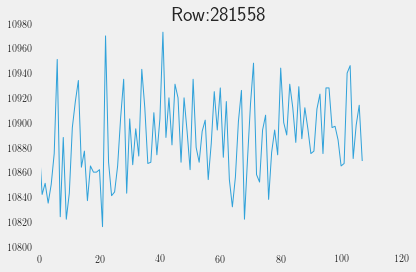

In [356]:
fig = figure()#figsize=(6,6))
ax  = fig.add_subplot(111)
# ax.plot([nan,nan])
corrections = []
for irow in np.where(rfc2_pred == 3)[0]:
    # ax.lines.pop()
    ax.clear()
    ax.plot(darks_reshaped[irow]);
    ax.set_title('Row:' + str(irow))
    fig.canvas.draw()
    display.display(plt.gcf())
    display.clear_output(wait=True)

In [300]:
rfc_pred_train = rfc.predict(samples_train_set_resort_scaled.T)

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.8s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    1.1s finished


In [305]:
1-np.abs(rfc_pred_train - classes_train_resort).sum() / classes_train_resort.size

0.98804456118105244

In [ ]:
rfc.predict(samples_train_set_resort_scaled.T)